<a href="https://colab.research.google.com/github/chrisseiler96/DS-Sprint-01-Dealing-With-Data/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

### Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [37]:
#Loading and inspecting the dataset

import pandas as pd



df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)
df.columns = ['patient_age','year_of_op','positive_nodes','survival']


df.head(10)

,patient_age,year_of_op,positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [9]:
#No Missing Values

df.isnull().sum()

patient_age       0
year_of_op        0
positive_nodes    0
survival          0
dtype: int64

In [0]:
#changing survival to binary

i = 0
for observation in df['survival']:
  if observation == 2:
    df.survival[i] = 0
  i=i+1  

In [49]:
df.head(5)

,patient_age,year_of_op,positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [50]:
df.shape

(306, 4)

In [51]:
df.describe()

,patient_age,year_of_op,positive_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [52]:
df.head()

,patient_age,year_of_op,positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Lets describe the variables



#Patient Age: Time is normally continous, but in this context it looks like it 
#can only have an integer value between 30 and 83. 
#For our purposes this is discrete.
#Age should be completely independent of all other variables aswell



#Year of Operation: This appears to range between 58 - 69 (1958-1969).
#Time is normally continuous, but again in this context we'll call this
#variable discrete


#Positive Nodes: This appears to range from 0-52. It appears to be all
#integer values. This may actually be continous (it may be possible to have a
# near infinite amount of these), but we'll consider it discrete because it's 
# only integer values in our dataset and they're only 52 possible unique values


#Survival: This is categorical.

In [44]:
df.head()

,patient_age,year_of_op,positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [75]:
#this appears as though younger patients are more likely to survive. 
#Lets look at it in percents aswell.


age_bins = pd.cut(df['patient_age'], bins=[30,35,40,45,50,55,60,65,70,75,80,85])

pd.crosstab(age_bins,df.survival)

survival,0,1
patient_age,,
"(30, 35]",2,11
"(35, 40]",2,25
"(40, 45]",15,31
"(45, 50]",14,33
"(50, 55]",18,36
"(55, 60]",8,31
"(60, 65]",11,28
"(65, 70]",7,17
"(70, 75]",2,8


In [76]:
#From this I see that most people with cancer are in the 50-60 year range.
# Lets reformat the table and look at percents again.

pd.crosstab(age_bins,df.survival,normalize='columns')

survival,0,1
patient_age,,
"(30, 35]",0.024691,0.049550
"(35, 40]",0.024691,0.112613
"(40, 45]",0.185185,0.139640
"(45, 50]",0.172840,0.148649
"(50, 55]",0.222222,0.162162
"(55, 60]",0.098765,0.139640
"(60, 65]",0.135802,0.126126
"(65, 70]",0.086420,0.076577
"(70, 75]",0.024691,0.036036


In [77]:
pd.crosstab(df.survival,age_bins,normalize='columns')

patient_age,"(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]"
survival,,,,,,,,,,,
0,0.153846,0.074074,0.326087,0.297872,0.333333,0.205128,0.282051,0.291667,0.2,0.333333,1.0
1,0.846154,0.925926,0.673913,0.702128,0.666667,0.794872,0.717949,0.708333,0.8,0.666667,0.0


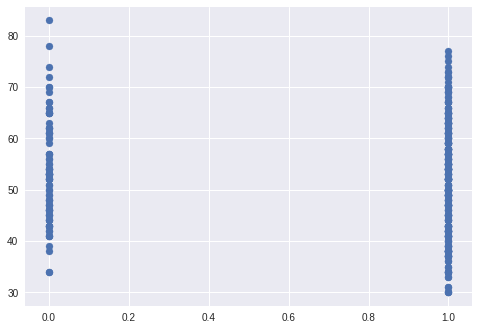

In [60]:
import matplotlib.pyplot as plt



plt.scatter( df.survival, df.patient_age)


#it appears as though surviving (1) has a pretty even distribution for all ages below
#70 or so. Dying seems to be somewhat spuradic 
#I'd hypothesize there is another variable related to survival

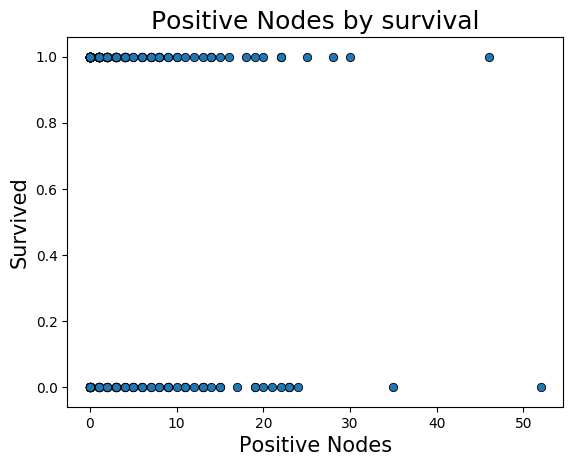

In [61]:
#Lets take a step back and make some nice plots.

plt.rcdefaults()
plt.rc('axes', axisbelow=True)

fig, ax1 = plt.subplots()


ax1.set_xlabel('Positive Nodes', fontsize=15)
ax1.set_ylabel('Survived', fontsize=15)
ax1.set_title('Positive Nodes by Survival',fontsize=18)



ax1.scatter(df['positive_nodes'],df['survival'],edgecolors='black',linewidths=0.6)

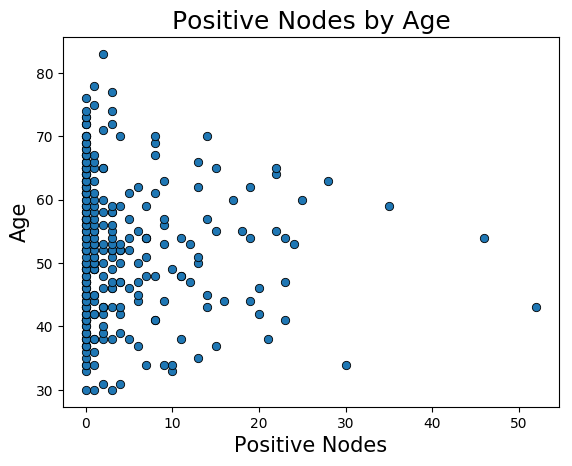

In [63]:
fig, ax1 = plt.subplots()


ax1.set_xlabel('Positive Nodes', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Positive Nodes by Age',fontsize=18)



ax1.scatter(df['positive_nodes'],df['patient_age'],edgecolors='black',linewidths=0.6)

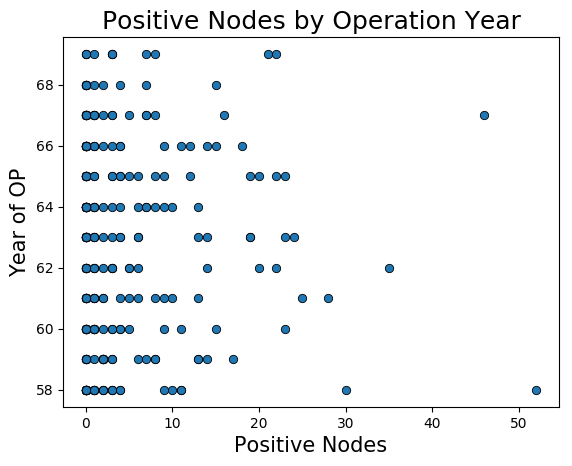

In [65]:
fig, ax1 = plt.subplots()


ax1.set_xlabel('Positive Nodes', fontsize=15)
ax1.set_ylabel('Year of OP', fontsize=15)
ax1.set_title('Positive Nodes by Operation Year',fontsize=18)



ax1.scatter(df['positive_nodes'],df['year_of_op'],edgecolors='black',linewidths=0.6)

In [67]:
pd.crosstab(df['positive_nodes'],df['year_of_op'],normalize='columns')

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
positive_nodes,,,,,,,,,,,,
0,0.444444,0.296296,0.392857,0.423077,0.391304,0.466667,0.548387,0.464286,0.535714,0.44,0.615385,0.272727
1,0.166667,0.037037,0.250000,0.153846,0.130435,0.133333,0.129032,0.071429,0.107143,0.20,0.076923,0.090909
2,0.083333,0.296296,0.035714,0.076923,0.043478,0.033333,0.032258,0.000000,0.035714,0.04,0.076923,0.000000
3,0.083333,0.074074,0.071429,0.000000,0.130435,0.033333,0.032258,0.071429,0.035714,0.08,0.000000,0.272727
4,0.055556,0.000000,0.071429,0.038462,0.000000,0.066667,0.032258,0.071429,0.071429,0.00,0.076923,0.000000
5,0.000000,0.000000,0.035714,0.038462,0.086957,0.000000,0.000000,0.035714,0.000000,0.04,0.000000,0.000000
6,0.000000,0.037037,0.000000,0.038462,0.043478,0.066667,0.032258,0.035714,0.000000,0.00,0.000000,0.000000
7,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000,0.08,0.076923,0.090909
8,0.000000,0.074074,0.000000,0.038462,0.000000,0.000000,0.032258,0.035714,0.000000,0.04,0.000000,0.090909


In [71]:
pd.crosstab(df['survival'],df['year_of_op'])

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
survival,,,,,,,,,,,,
0,12,9,4,3,7,8,8,13,6,4,3,4
1,24,18,24,23,16,22,23,15,22,21,10,7


In [72]:
pd.crosstab(df['survival'],df['year_of_op'],normalize='columns')

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
survival,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


In [73]:
pd.crosstab(df['year_of_op'],df['survival'],normalize='columns')

survival,0,1
year_of_op,,
58,0.148148,0.106667
59,0.111111,0.080000
60,0.049383,0.106667
61,0.037037,0.102222
62,0.086420,0.071111
63,0.098765,0.097778
64,0.098765,0.102222
65,0.160494,0.066667
66,0.074074,0.097778


In [91]:
pd.crosstab(age_bins,df.year_of_op,normalize='columns')

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
patient_age,,,,,,,,,,,,
"(30, 35]",0.055556,0.074074,0.107143,0.038462,0.000000,0.033333,0.033333,0.037037,0.035714,0.04,0.000000,0.000000
"(35, 40]",0.111111,0.111111,0.214286,0.000000,0.045455,0.133333,0.033333,0.037037,0.107143,0.08,0.000000,0.181818
"(40, 45]",0.111111,0.222222,0.142857,0.115385,0.045455,0.166667,0.266667,0.185185,0.071429,0.20,0.076923,0.181818
"(45, 50]",0.166667,0.074074,0.071429,0.269231,0.272727,0.233333,0.133333,0.111111,0.178571,0.12,0.076923,0.090909
"(50, 55]",0.166667,0.222222,0.250000,0.076923,0.227273,0.166667,0.066667,0.222222,0.178571,0.08,0.230769,0.454545
"(55, 60]",0.055556,0.074074,0.142857,0.230769,0.136364,0.066667,0.300000,0.074074,0.107143,0.20,0.000000,0.090909
"(60, 65]",0.138889,0.185185,0.035714,0.192308,0.181818,0.066667,0.100000,0.148148,0.178571,0.08,0.230769,0.000000
"(65, 70]",0.138889,0.037037,0.035714,0.076923,0.000000,0.066667,0.033333,0.074074,0.142857,0.12,0.230769,0.000000
"(70, 75]",0.027778,0.000000,0.000000,0.000000,0.090909,0.066667,0.033333,0.037037,0.000000,0.04,0.153846,0.000000


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# **1. It appears that the year of Operation has a positive correlation with survival.**

In [88]:
pd.crosstab(df['survival'],df['year_of_op'],normalize='columns')

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
survival,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


**The year 1965 stands out - it breaks the trend..**
**But with a further look at the data - the operations performed in had a denser distribution of people above 50 years old.**
**There is a confounding relationship Between age, year of operation, and survival - I discuss it further in this project. For now - we can peek at a table of age by year of operation:**

In [92]:
pd.crosstab(age_bins,df.year_of_op,normalize='columns')

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
patient_age,,,,,,,,,,,,
"(30, 35]",0.055556,0.074074,0.107143,0.038462,0.000000,0.033333,0.033333,0.037037,0.035714,0.04,0.000000,0.000000
"(35, 40]",0.111111,0.111111,0.214286,0.000000,0.045455,0.133333,0.033333,0.037037,0.107143,0.08,0.000000,0.181818
"(40, 45]",0.111111,0.222222,0.142857,0.115385,0.045455,0.166667,0.266667,0.185185,0.071429,0.20,0.076923,0.181818
"(45, 50]",0.166667,0.074074,0.071429,0.269231,0.272727,0.233333,0.133333,0.111111,0.178571,0.12,0.076923,0.090909
"(50, 55]",0.166667,0.222222,0.250000,0.076923,0.227273,0.166667,0.066667,0.222222,0.178571,0.08,0.230769,0.454545
"(55, 60]",0.055556,0.074074,0.142857,0.230769,0.136364,0.066667,0.300000,0.074074,0.107143,0.20,0.000000,0.090909
"(60, 65]",0.138889,0.185185,0.035714,0.192308,0.181818,0.066667,0.100000,0.148148,0.178571,0.08,0.230769,0.000000
"(65, 70]",0.138889,0.037037,0.035714,0.076923,0.000000,0.066667,0.033333,0.074074,0.142857,0.12,0.230769,0.000000
"(70, 75]",0.027778,0.000000,0.000000,0.000000,0.090909,0.066667,0.033333,0.037037,0.000000,0.04,0.153846,0.000000


**If we look at the year 1965, only about 37% of the patients were younger than 50 years old!**


# 2. **It appears as though younger people have a higher rate of survival. Age has a negative correlation with survival.**





In [86]:
pd.crosstab(df.survival,age_bins,normalize='columns')

patient_age,"(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]"
survival,,,,,,,,,,,
0,0.153846,0.074074,0.326087,0.297872,0.333333,0.205128,0.282051,0.291667,0.2,0.333333,1.0
1,0.846154,0.925926,0.673913,0.702128,0.666667,0.794872,0.717949,0.708333,0.8,0.666667,0.0


This table is broken up into ages with an interval of 5.
The groups 30-35 and 35-40 both have a survival rate of 80% or higher. It drops from there - the end groups (70-75 and 80-85) have a higher survival rate, but this is because they simply have fewer samples.

**Number in each category:**

In [87]:
pd.crosstab(df.survival,age_bins)

patient_age,"(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]"
survival,,,,,,,,,,,
0,2,2,15,14,18,8,11,7,2,1,1
1,11,25,31,33,36,31,28,17,8,2,0


# 3. It appears Year of Operation stands as a confounding variable between the independent variable Age, and the dependent variable Survival


**There is no perfect correlation between any two pairs of these variables - but only between all three**


**As an aside, lymph nodes appear to have no direct correlation with the aforementioned relationship - but I'd like to look at it further to be sure.**

*PS: My aim was to use a barchart to further show the relationship between all three variables, a series of scatterplots was not ideal - but I need to practice making barcharts as I couldn't properly fit it to the data.*